In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

#경사하강법 구현 1: 제일 간단한 방식
#    시작 지점에서의 기울기 비례하여 이동해 가며 찾는 법
def grad_descent(f, df, init_x, learning_rate=0.01, step_num=100):
    x = init_x
    x_log, y_log = [x], [f(x)]
    
    for i in range(step_num):
        grad = df(x)
        x -= learning_rate * grad
        
        x_log.append(x)
        y_log.append(f(x))
        
    return x_log, y_log

In [3]:
#볼록함수 경사하강법
def f1(x):
    return x**2

def df1(x):
    return 2*x

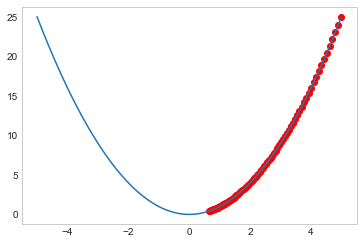

In [4]:
x_init = 5
x_log, y_log = grad_descent(f1, df1, init_x=x_init)
plt.scatter(x_log, y_log, color='red')

x = np.arange(-5, 5, 0.01)
plt.plot(x, f1(x))
plt.grid()
plt.show()

In [5]:
#비볼록함수 경사하강법
def f2(x):
    return 0.01*x**4 - 0.3*x**3 - 1.0*x + 10.0

def df2(x):
    return 0.04*x**3 - 0.9*x**2 - 1.0

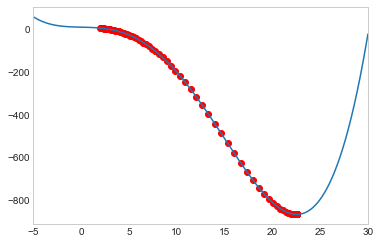

In [6]:
x_init = 2
x_log, y_log = grad_descent(f2, df2, init_x=x_init)
plt.scatter(x_log, y_log, color='red')

x = np.arange(-5, 30, 0.01)
plt.plot(x, f2(x))
plt.xlim(-5, 30)
plt.grid()
plt.show()

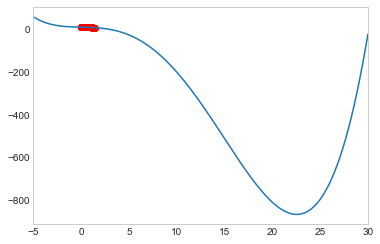

In [7]:
#근데 x_init이 2가 아닌 0이라면...?
x_init = 0
x_log, y_log = grad_descent(f2, df2, init_x=x_init)
plt.scatter(x_log, y_log, color='red')

x = np.arange(-5, 30, 0.01)
plt.plot(x, f2(x))
plt.xlim(-5, 30)
plt.grid()
plt.show()

In [8]:
#전역 최저값 vs 지역 최저값
def f3(x):
    return x*np.sin(x**2) + 1

def df3(x):
    return np.sin(x**2) + x*np.cos(x**2)*2*x

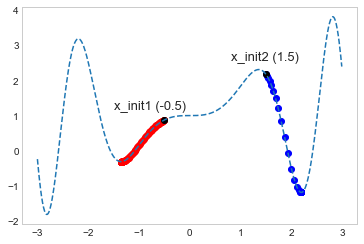

In [9]:
x_init1 = -0.5
x_log1, y_log1 = grad_descent(f3, df3, init_x=x_init1)
plt.scatter(x_log1, y_log1, color='red')

x_init2 = 1.5
x_log2, y_log2 = grad_descent(f3, df3, init_x=x_init2)
plt.scatter(x_log2, y_log2, color='blue')


x = np.arange(-3, 3, 0.01)
plt.plot(x, f3(x), '--')
plt.scatter(x_init1, f3(x_init1), color='k')
plt.text(x_init1 - 1.0, f3(x_init1) + 0.3, "x_init1 ({})".format(x_init1), fontsize=13)
plt.scatter(x_init2, f3(x_init2), color='k')
plt.text(x_init2 - 0.7, f3(x_init2) + 0.4, "x_init2 ({})".format(x_init2), fontsize=13)
plt.grid()
plt.show()

In [10]:
#경사하강법 구현 2
def grad_descent2(f, df, init_x, learning_rate=0.01, step_num=100):
    eps = 1e-5
    count = 0
    
    old_x = init_x
    min_x = old_x
    min_y = f(min_x)
    
    x_log, y_log = [min_x], [min_y]
    for i in range(step_num):
        grad = df(old_x)
        new_x = old_x - learning_rate * grad
        new_y = f(new_x)
        
        if min_y > new_y:
            min_x = new_x
            min_y = new_y
            
        if np.abs(old_x - new_x) < eps:
            break
        
        x_log.append(new_x)
        y_log.append(new_y)
        
        old_x = new_x
        count += 1
    
    return x_log, y_log, count        

count1: 100
count2: 28
count3: 17


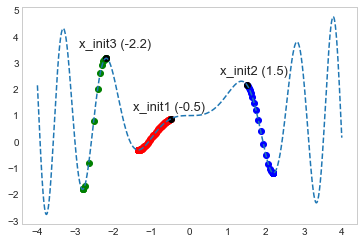

In [11]:
x_init1 = -0.5
x_log1, y_log1, count1 = grad_descent2(f3, df3, init_x=x_init1)
plt.scatter(x_log1, y_log1, color='red')
print("count1:", count1)

x_init2 = 1.5
x_log2, y_log2, count2 = grad_descent2(f3, df3, init_x=x_init2)
plt.scatter(x_log2, y_log2, color='blue')
print("count2:", count2)

x_init3 = -2.2
x_log3, y_log3, count3 = grad_descent2(f3, df3, init_x=x_init3)
plt.scatter(x_log3, y_log3, color='green')
print("count3:", count3)



x = np.arange(-4, 4, 0.01)
plt.plot(x, f3(x), '--')

plt.scatter(x_init1, f3(x_init1), color='k')
plt.text(x_init1 - 1.0, f3(x_init1) + 0.3, "x_init1 ({})".format(x_init1), fontsize=13)

plt.scatter(x_init2, f3(x_init2), color='k')
plt.text(x_init2 - 0.7, f3(x_init2) + 0.4, "x_init2 ({})".format(x_init2), fontsize=13)

plt.scatter(x_init3, f3(x_init3), color='k')
plt.text(x_init3 - 0.7, f3(x_init3) + 0.4, "x_init3 ({})".format(x_init3), fontsize=13)

plt.grid()
plt.show()

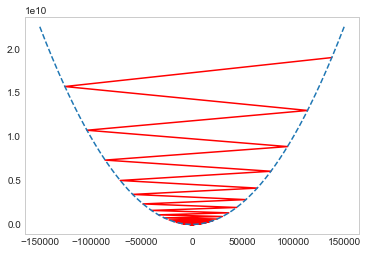

In [12]:
#learning_rate가 크면 발산!! 작으면 효율 하락!!
x_init = 10
x_log, y_log = grad_descent(f1, df1, init_x=x_init, learning_rate=1.05)
plt.plot(x_log, y_log, color='red')

x = np.arange(-150000, 150000, 10)
plt.plot(x, f1(x), '--')
plt.grid()
plt.show()

init value = 0.001, count = 100
init value = 0.01, count = 100
init value = 0.1, count = 60
init value = 1.01, count = 100


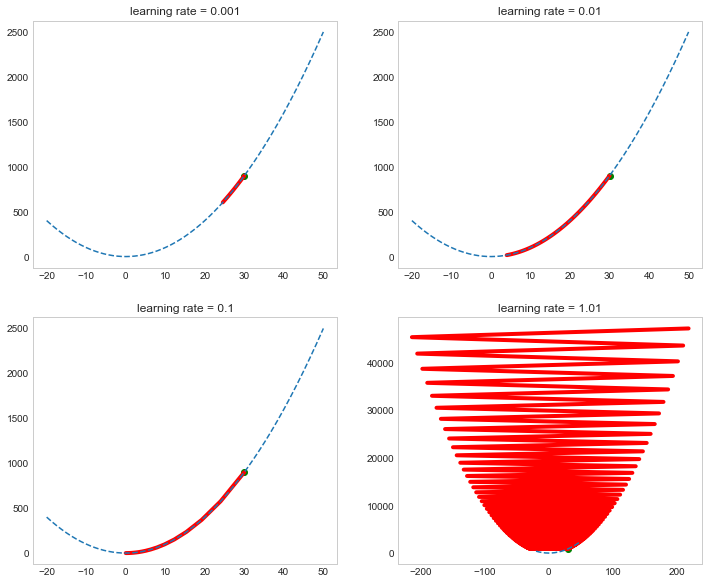

In [13]:
#학습률별 경사하강법
lr_list = [0.001, 0.01, 0.1, 1.01]

init_x = 30.0
x = np.arange(-20, 50, 0.01)
fig = plt.figure(figsize=(12, 10))

for i, lr in enumerate(lr_list):
    x_log, y_log, count = grad_descent2(f1, df1, init_x=init_x, learning_rate=lr)
    ax = fig.add_subplot(2, 2, i+1)
    ax.scatter(init_x, f1(init_x), color='green')
    ax.plot(x_log, y_log, color='red', linewidth='4')
    ax.plot(x, f1(x), '--')
    ax.grid()
    ax.title.set_text('learning rate = {}'.format(str(lr)))
    print("init value = {}, count = {}".format(str(lr), str(count)))

count1: 100
count2: 82
count3: 50


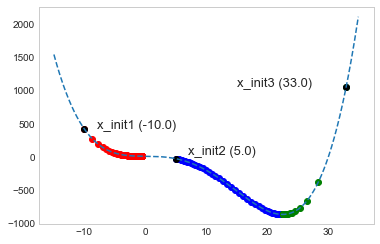

In [15]:
#안장점(Saddle Point)
x_init1 = -10.0
x_log1, y_log1, count1 = grad_descent2(f2, df2, init_x=x_init1)
plt.scatter(x_log1, y_log1, color='red')
print("count1:", count1)

x_init2 = 5.0
x_log2, y_log2, count2 = grad_descent2(f2, df2, init_x=x_init2)
plt.scatter(x_log2, y_log2, color='blue')
print("count2:", count2)

x_init3 = 33.0
x_log3, y_log3, count3 = grad_descent2(f2, df2, init_x=x_init3)
plt.scatter(x_log3, y_log3, color='green')
print("count3:", count3)



x = np.arange(-15, 35, 0.01)
plt.plot(x, f2(x), '--')

plt.scatter(x_init1, f2(x_init1), color='k')
plt.text(x_init1 + 2.0, f2(x_init1) + 0.2, "x_init1 ({})".format(x_init1), fontsize=13)

plt.scatter(x_init2, f2(x_init2), color='k')
plt.text(x_init2 + 2.0, f2(x_init2) + 53, "x_init2 ({})".format(x_init2), fontsize=13)

plt.scatter(x_init3, f2(x_init3), color='k')
plt.text(x_init3 - 18, f2(x_init3), "x_init3 ({})".format(x_init3), fontsize=13)

plt.grid()
plt.show() 

count1: 17
count2: 100


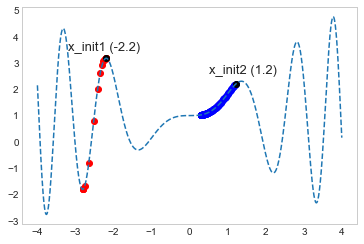

In [16]:
x_init1 = -2.2
x_log1, y_log1, count1 = grad_descent2(f3, df3, init_x=x_init1)
plt.scatter(x_log1, y_log1, color='red')
print("count1:", count1)

x_init2 = 1.2
x_log2, y_log2, count2 = grad_descent2(f3, df3, init_x=x_init2)
plt.scatter(x_log2, y_log2, color='blue')
print("count2:", count2)

x = np.arange(-4, 4, 0.01)
plt.plot(x, f3(x), '--')

plt.scatter(x_init1, f3(x_init1), color='k')
plt.text(x_init1 - 1.0, f3(x_init1) + 0.3, "x_init1 ({})".format(x_init1), fontsize=13)

plt.scatter(x_init2, f3(x_init2), color='k')
plt.text(x_init2 - 0.7, f3(x_init2) + 0.4, "x_init2 ({})".format(x_init2), fontsize=13)

plt.grid()
plt.show()